### Problem of Sigmoid<br><br>

sigmoid func은 좌우 끝단에서 Gradient Backpropagation 계산 시 크기가 매우 작기 때문에   

gradient vanishing이 생기게 된다.  
  
  그를 방지하기 위해 ReLU( f(x) = max(0, x))를 사용하기로 한다.<br><br>
  
  torch.nn.relu(x)  
  
  torch.nn.leaky_relu(x, 0.01) 등...

### Optimizer in PyTorch<br><br>

pytorch에서 제공하는 optimizers를 모두 어떻게 익혀야 할까?


In [12]:
import torch
import torchvision.datasets as dsets
import torchvision.transforms as transforms
import random

In [13]:
random.seed(777)
torch.manual_seed(777)

## 단층 구성

In [14]:
# parameters
learning_rate = 0.001
training_epochs = 15
batch_size = 100

In [15]:
#MNIST dataset download
mnist_train = dsets.MNIST(root='MNIST_data/',
                          train = True,
                          transform=transforms.ToTensor(),
                          download=True)
mnist_test = dsets.MNIST(root='MNIST_data/',
                          train = False,
                          transform=transforms.ToTensor(),
                          download=True)

In [16]:
# dataset loader -> for mini_batch
data_loader = torch.utils.data.DataLoader(dataset=mnist_train,
                                         batch_size = batch_size,
                                         shuffle = True,
                                         drop_last = True)


In [17]:
# MNIST data image of shape 28 * 28 = 784 , output = 0~9
linear = torch.nn.Linear(784, 10, bias = True)

In [18]:
# initialization
torch.nn.init.normal_(linear.weight)

Parameter containing:
tensor([[-0.1953, -0.4404,  0.0139,  ...,  0.7510,  1.5190,  0.9637],
        [ 0.4146, -1.0660, -0.9969,  ..., -0.3259, -0.2695, -1.3316],
        [ 0.2600, -1.1821,  0.0065,  ...,  1.0648, -1.2251,  0.9841],
        ...,
        [ 0.0279, -1.7242, -1.1723,  ...,  1.3651, -0.0689, -0.7931],
        [ 0.0952,  0.1939,  0.1636,  ..., -1.0489,  0.6224, -1.7181],
        [ 2.6504,  0.6297, -1.6571,  ..., -0.0781, -1.1398, -0.8711]],
       requires_grad=True)

In [19]:
# define cost/loss & optimizer
criterion = torch.nn.CrossEntropyLoss() # CEL -> Softmax is internally computed.
optimizer = torch.optim.Adam(linear.parameters(), lr=learning_rate) # Adam을 통해 optimization

In [65]:
total_batch = len(data_loader)
for epoch in range(training_epochs):
    avg_cost = 0
    
    for X, Y in data_loader:
        # Reshape input image into [batch_size by 784]
        # Label is not one-hot encoded
        X = X.view(-1, 28 * 28)
        Y = Y
    
        optimizer.zero_grad()
        hypothesis = linear(X)
        cost = criterion(hypothesis, Y)
        cost.backward()
        optimizer.step()
    
        avg_cost += cost / total_batch
    
    print('Epoch:', '%04d' % (epoch +1), 'Cost =', '{:.9f}'.format(avg_cost))
    
print("Learning finished")

Epoch: 0001 Cost = 5.151755810
Epoch: 0002 Cost = 1.636840463
Epoch: 0003 Cost = 1.084609270
Epoch: 0004 Cost = 0.858343899
Epoch: 0005 Cost = 0.732708633
Epoch: 0006 Cost = 0.651342332
Epoch: 0007 Cost = 0.594313323
Epoch: 0008 Cost = 0.551631629
Epoch: 0009 Cost = 0.518340468
Epoch: 0010 Cost = 0.491586238
Epoch: 0011 Cost = 0.469289869
Epoch: 0012 Cost = 0.450429320
Epoch: 0013 Cost = 0.434171110
Epoch: 0014 Cost = 0.420358211
Epoch: 0015 Cost = 0.407902867
Learning finished


In [66]:
# Test the model using test sets
with torch.no_grad():
    X_test = mnist_test.test_data.view(-1, 28 * 28).float()
    Y_test = mnist_test.test_labels

    prediction = model(X_test)
    correct_prediction = torch.argmax(prediction, 1) == Y_test
    accuracy = correct_prediction.float().mean()
    print('Accuracy:', accuracy.item())

    # Get one and predict
    r = random.randint(0, len(mnist_test) - 1)
    X_single_data = mnist_test.test_data[r:r + 1].view(-1, 28 * 28).float()
    Y_single_data = mnist_test.test_labels[r:r + 1]

    print('Label: ', Y_single_data.item())
    single_prediction = model(X_single_data)
    print('Prediction: ', torch.argmax(single_prediction, 1).item())

C:\Users\JH PARK\anaconda3\lib\site-packages\torchvision\datasets\mnist.py:60: UserWarning: test_data has been renamed data
  warnings.warn("test_data has been renamed data")
C:\Users\JH PARK\anaconda3\lib\site-packages\torchvision\datasets\mnist.py:50: UserWarning: test_labels has been renamed targets
  warnings.warn("test_labels has been renamed targets")


Accuracy: 0.9818999767303467
Label:  9
Prediction:  9


## 3-Layer 구성

In [16]:
# parameters
learning_rate = 0.001
training_epochs = 15
batch_size = 100

In [17]:
data_loader = torch.utils.data.DataLoader(dataset=mnist_train,
                                          batch_size=batch_size,
                                          shuffle=True,
                                          drop_last=True)

In [18]:
# nn layers
linear1 = torch.nn.Linear(784, 256, bias=True)
linear2 = torch.nn.Linear(256, 256, bias=True)
linear3 = torch.nn.Linear(256, 10, bias=True)
relu = torch.nn.ReLU()

In [19]:
# Initialization
torch.nn.init.normal_(linear1.weight)
torch.nn.init.normal_(linear2.weight)
torch.nn.init.normal_(linear3.weight)

Parameter containing:
tensor([[-0.5278, -1.3519,  0.5642,  ...,  1.9428, -1.2835, -0.3822],
        [ 1.0367, -0.4500,  0.1406,  ...,  0.1321,  1.2034,  0.2417],
        [ 1.2971, -1.2299,  1.1202,  ..., -1.1232, -0.3211,  0.9138],
        ...,
        [-2.7496,  0.0798, -0.3866,  ..., -0.4564, -1.3117, -0.8943],
        [ 0.7057, -0.8695,  0.2858,  ..., -0.3788,  0.8571, -0.9284],
        [-0.4482,  1.9061, -0.4519,  ...,  0.3278, -1.0181,  0.2806]],
       requires_grad=True)

In [21]:
# model
model = torch.nn.Sequential(linear1, relu, linear2, relu, linear3) # 3번째는 CEL을 사용할 것이므로 설정 x

In [23]:
# define cost/loss & optimizer
criterion = torch.nn.CrossEntropyLoss()   # Softmax is internally computed.
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

In [26]:
total_batch = len(data_loader)
for epoch in range(training_epochs):
    avg_cost = 0

    for X, Y in data_loader:
        # reshape input image into [batch_size by 784]
        # label is not one-hot encoded
        X = X.view(-1, 28 * 28)
        Y = Y

        optimizer.zero_grad()
        hypothesis = model(X)
        cost = criterion(hypothesis, Y)
        cost.backward()
        optimizer.step()

        avg_cost += cost / total_batch

    print('Epoch:', '%04d' % (epoch + 1), 'cost =', '{:.9f}'.format(avg_cost))

print('Learning finished')

Epoch: 0001 cost = 179.461685181
Epoch: 0002 cost = 37.951999664
Epoch: 0003 cost = 23.810924530
Epoch: 0004 cost = 16.450050354
Epoch: 0005 cost = 11.947896957
Epoch: 0006 cost = 8.710197449
Epoch: 0007 cost = 6.542108059
Epoch: 0008 cost = 4.934839725
Epoch: 0009 cost = 3.681132078
Epoch: 0010 cost = 2.780344725
Epoch: 0011 cost = 1.994268298
Epoch: 0012 cost = 1.584544778
Epoch: 0013 cost = 1.166052699
Epoch: 0014 cost = 0.890817463
Epoch: 0015 cost = 0.740841866
Learning finished


In [28]:
# Test the model using test sets
with torch.no_grad():
    X_test = mnist_test.test_data.view(-1, 28 * 28).float()
    Y_test = mnist_test.test_labels

    prediction = model(X_test)
    correct_prediction = torch.argmax(prediction, 1) == Y_test
    accuracy = correct_prediction.float().mean()
    print('Accuracy:', accuracy.item())

    # Get one and predict
    r = random.randint(0, len(mnist_test) - 1)
    X_single_data = mnist_test.test_data[r:r + 1].view(-1, 28 * 28).float()
    Y_single_data = mnist_test.test_labels[r:r + 1]

    print('Label: ', Y_single_data.item())
    single_prediction = model(X_single_data)
    print('Prediction: ', torch.argmax(single_prediction, 1).item())

C:\Users\JH PARK\anaconda3\lib\site-packages\torchvision\datasets\mnist.py:50: UserWarning: test_labels has been renamed targets
  warnings.warn("test_labels has been renamed targets")


Accuracy: 0.9466000199317932
Label:  8
Prediction:  8


### Weight Initialization (with Xavier)<br><br>
RBM Initialization -> pre-training step을 사용  
Example : Deep Belif Network 확인

![image.png](./img/09_xavier.png)

In [43]:
# Xavier in PyTorch Library
'''
def _calculate_fan_in_and_fan_out(tensor):
    dimensions = tensor.dim()
    if dimensions < 2:
        raise ValueError("Fan in and fan out can not be computed for tensor with fewer than 2 dimensions")

    num_input_fmaps = tensor.size(1)
    num_output_fmaps = tensor.size(0)
    receptive_field_size = 1
    if tensor.dim() > 2:
        receptive_field_size = tensor[0][0].numel()
    fan_in = num_input_fmaps * receptive_field_size
    fan_out = num_output_fmaps * receptive_field_size

    return fan_in, fan_out


def xavier_uniform_(tensor, gain=1.):
    # type: (Tensor, float) -> Tensor
    r"""Fills the input `Tensor` with values according to the method
    described in `Understanding the difficulty of training deep feedforward
    neural networks` - Glorot, X. & Bengio, Y. (2010), using a uniform
    distribution. The resulting tensor will have values sampled from
    :math:`\mathcal{U}(-a, a)` where
    .. math::
        a = \text{gain} \times \sqrt{\frac{6}{\text{fan\_in} + \text{fan\_out}}}
    Also known as Glorot initialization.
    Args:
        tensor: an n-dimensional `torch.Tensor`
        gain: an optional scaling factor
    Examples:
        >>> w = torch.empty(3, 5)
        >>> nn.init.xavier_uniform_(w, gain=nn.init.calculate_gain('relu'))
    """
    fan_in, fan_out = _calculate_fan_in_and_fan_out(tensor)
    std = gain * math.sqrt(2.0 / float(fan_in + fan_out))
    a = math.sqrt(3.0) * std  # Calculate uniform bounds from standard deviation

    return _no_grad_uniform_(tensor, -a, a)


def xavier_normal_(tensor, gain=1.):
    # type: (Tensor, float) -> Tensor
    r"""Fills the input `Tensor` with values according to the method
    described in `Understanding the difficulty of training deep feedforward
    neural networks` - Glorot, X. & Bengio, Y. (2010), using a normal
    distribution. The resulting tensor will have values sampled from
    :math:`\mathcal{N}(0, \text{std}^2)` where
    .. math::
        \text{std} = \text{gain} \times \sqrt{\frac{2}{\text{fan\_in} + \text{fan\_out}}}
    Also known as Glorot initialization.
    Args:
        tensor: an n-dimensional `torch.Tensor`
        gain: an optional scaling factor
    Examples:
        >>> w = torch.empty(3, 5)
        >>> nn.init.xavier_normal_(w)
    """
    fan_in, fan_out = _calculate_fan_in_and_fan_out(tensor)
    std = gain * math.sqrt(2.0 / float(fan_in + fan_out))

    return _no_grad_normal_(tensor, 0., std)
'''

'\ndef _calculate_fan_in_and_fan_out(tensor):\n    dimensions = tensor.dim()\n    if dimensions < 2:\n        raise ValueError("Fan in and fan out can not be computed for tensor with fewer than 2 dimensions")\n\n    num_input_fmaps = tensor.size(1)\n    num_output_fmaps = tensor.size(0)\n    receptive_field_size = 1\n    if tensor.dim() > 2:\n        receptive_field_size = tensor[0][0].numel()\n    fan_in = num_input_fmaps * receptive_field_size\n    fan_out = num_output_fmaps * receptive_field_size\n\n    return fan_in, fan_out\n\n\ndef xavier_uniform_(tensor, gain=1.):\n    # type: (Tensor, float) -> Tensor\n    r"""Fills the input `Tensor` with values according to the method\n    described in `Understanding the difficulty of training deep feedforward\n    neural networks` - Glorot, X. & Bengio, Y. (2010), using a uniform\n    distribution. The resulting tensor will have values sampled from\n    :math:`\\mathcal{U}(-a, a)` where\n    .. math::\n        a = \text{gain} \times \\sqrt{\

In [32]:
# dataset loader
data_loader = torch.utils.data.DataLoader(dataset=mnist_train,
                                          batch_size=batch_size,
                                          shuffle=True,
                                          drop_last=True)

In [34]:
# nn layers
linear1 = torch.nn.Linear(784, 256, bias=True)
linear2 = torch.nn.Linear(256, 256, bias=True)
linear3 = torch.nn.Linear(256, 10, bias=True)
relu = torch.nn.ReLU()

In [35]:
# xavier initialization
torch.nn.init.xavier_uniform_(linear1.weight)
torch.nn.init.xavier_uniform_(linear2.weight)
torch.nn.init.xavier_uniform_(linear3.weight)

Parameter containing:
tensor([[-0.0033,  0.0786,  0.1367,  ...,  0.0532, -0.0361,  0.0356],
        [ 0.0128, -0.1233, -0.1467,  ...,  0.1217, -0.0690, -0.0701],
        [ 0.1249, -0.0924,  0.1501,  ...,  0.1253, -0.0222,  0.0065],
        ...,
        [ 0.0222, -0.1242,  0.1240,  ...,  0.0843,  0.0381, -0.0557],
        [ 0.0152,  0.0937, -0.1405,  ...,  0.1395, -0.1210, -0.0901],
        [-0.0906, -0.0648, -0.1269,  ..., -0.0432, -0.1251,  0.0235]],
       requires_grad=True)

In [37]:
# model
model = torch.nn.Sequential(linear1, relu, linear2, relu, linear3)

In [39]:
# define cost/loss & optimizer
criterion = torch.nn.CrossEntropyLoss()   # Softmax is internally computed.
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

In [41]:
total_batch = len(data_loader)
for epoch in range(training_epochs):
    avg_cost = 0

    for X, Y in data_loader:
        # reshape input image into [batch_size by 784]
        # label is not one-hot encoded
        X = X.view(-1, 28 * 28)
        Y = Y

        optimizer.zero_grad()
        hypothesis = model(X)
        cost = criterion(hypothesis, Y)
        cost.backward()
        optimizer.step()

        avg_cost += cost / total_batch

    print('Epoch:', '%04d' % (epoch + 1), 'cost =', '{:.9f}'.format(avg_cost))

print('Learning finished')

Epoch: 0001 cost = 0.240819514
Epoch: 0002 cost = 0.090440504
Epoch: 0003 cost = 0.061061218
Epoch: 0004 cost = 0.042703390
Epoch: 0005 cost = 0.032572050
Epoch: 0006 cost = 0.027103337
Epoch: 0007 cost = 0.020051045
Epoch: 0008 cost = 0.017372213
Epoch: 0009 cost = 0.015832329
Epoch: 0010 cost = 0.011393580
Epoch: 0011 cost = 0.014805009
Epoch: 0012 cost = 0.009550594
Epoch: 0013 cost = 0.011380431
Epoch: 0014 cost = 0.009704247
Epoch: 0015 cost = 0.010509749
Learning finished


In [42]:
# Test the model using test sets
with torch.no_grad():
    X_test = mnist_test.test_data.view(-1, 28 * 28).float()
    Y_test = mnist_test.test_labels

    prediction = model(X_test)
    correct_prediction = torch.argmax(prediction, 1) == Y_test
    accuracy = correct_prediction.float().mean()
    print('Accuracy:', accuracy.item())

    # Get one and predict
    r = random.randint(0, len(mnist_test) - 1)
    X_single_data = mnist_test.test_data[r:r + 1].view(-1, 28 * 28).float()
    Y_single_data = mnist_test.test_labels[r:r + 1]

    print('Label: ', Y_single_data.item())
    single_prediction = model(X_single_data)
    print('Prediction: ', torch.argmax(single_prediction, 1).item())

Accuracy: 0.9797000288963318
Label:  5
Prediction:  5


# Overfitting

Overfitting을 줄이기 위한 방법
* More data 
* Reduce the numbber of features
* Regularization
* Dropout

#### Dropout<br><br>

Neural Network 학습 중 각 Layer의 몇몇 Node를(설정한 비율만큼) 무작위로 on/off 하며 학습 

In [45]:
# parameters
learning_rate = 0.001
training_epochs = 15
batch_size = 100
drop_prob = 0.3

# MNIST dataset
mnist_train = dsets.MNIST(root='MNIST_data/',
                          train=True,
                          transform=transforms.ToTensor(),
                          download=True)

mnist_test = dsets.MNIST(root='MNIST_data/',
                         train=False,
                         transform=transforms.ToTensor(),
                         download=True)


# dataset loader
data_loader = torch.utils.data.DataLoader(dataset=mnist_train,
                                          batch_size=batch_size,
                                          shuffle=True,
                                          drop_last=True)

# nn layers
linear1 = torch.nn.Linear(784, 512, bias=True)
linear2 = torch.nn.Linear(512, 512, bias=True)
linear3 = torch.nn.Linear(512, 512, bias=True)
linear4 = torch.nn.Linear(512, 512, bias=True)
linear5 = torch.nn.Linear(512, 10, bias=True)
relu = torch.nn.ReLU()
# nn Dropout 사용 p 는 drpo할 확률을 말한다.
dropout = torch.nn.Dropout(p=drop_prob)

# xavier initialization
torch.nn.init.xavier_uniform_(linear1.weight)
torch.nn.init.xavier_uniform_(linear2.weight)
torch.nn.init.xavier_uniform_(linear3.weight)
torch.nn.init.xavier_uniform_(linear4.weight)
torch.nn.init.xavier_uniform_(linear5.weight)


Parameter containing:
tensor([[ 0.0415,  0.1060, -0.0156,  ..., -0.0302,  0.0363,  0.0635],
        [-0.0865,  0.0946, -0.0808,  ...,  0.0386,  0.0351,  0.0722],
        [-0.0165, -0.0747, -0.0002,  ...,  0.0190,  0.0345,  0.0454],
        ...,
        [-0.0561, -0.0491,  0.0819,  ..., -0.0829,  0.0920,  0.0317],
        [ 0.0114, -0.1032, -0.0831,  ..., -0.0366, -0.0950,  0.0080],
        [ 0.0169,  0.0397, -0.1043,  ...,  0.0018,  0.0408, -0.1002]],
       requires_grad=True)

In [47]:
# model - 각각 Dropout을 추가한다.
model = torch.nn.Sequential(linear1, relu, dropout,
                            linear2, relu, dropout,
                            linear3, relu, dropout,
                            linear4, relu, dropout,
                            linear5)

# define cost/loss & optimizer
criterion = torch.nn.CrossEntropyLoss()    # Softmax is internally computed.
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

In [48]:
total_batch = len(data_loader)
model.train()    # 중요! set the model to train mode (dropout=True)
for epoch in range(training_epochs):
    avg_cost = 0

    for X, Y in data_loader:
        # reshape input image into [batch_size by 784]
        # label is not one-hot encoded
        X = X.view(-1, 28 * 28)
        Y = Y

        optimizer.zero_grad()
        hypothesis = model(X)
        cost = criterion(hypothesis, Y)
        cost.backward()
        optimizer.step()

        avg_cost += cost / total_batch

    print('Epoch:', '%04d' % (epoch + 1), 'cost =', '{:.9f}'.format(avg_cost))

print('Learning finished')

Epoch: 0001 cost = 0.310249388
Epoch: 0002 cost = 0.144120649
Epoch: 0003 cost = 0.113168664
Epoch: 0004 cost = 0.095587030
Epoch: 0005 cost = 0.085564725
Epoch: 0006 cost = 0.074818723
Epoch: 0007 cost = 0.065905750
Epoch: 0008 cost = 0.062320158
Epoch: 0009 cost = 0.057608906
Epoch: 0010 cost = 0.057351172
Epoch: 0011 cost = 0.053665176
Epoch: 0012 cost = 0.050852511
Epoch: 0013 cost = 0.046929371
Epoch: 0014 cost = 0.045090009
Epoch: 0015 cost = 0.041312795
Learning finished


In [49]:
# Test model and check accuracy
with torch.no_grad():
    model.eval()    # 중요! set the model to evaluation mode (dropout=False)

    # Test the model using test sets
    X_test = mnist_test.test_data.view(-1, 28 * 28).float()
    Y_test = mnist_test.test_labels

    prediction = model(X_test)
    correct_prediction = torch.argmax(prediction, 1) == Y_test
    accuracy = correct_prediction.float().mean()
    print('Accuracy:', accuracy.item())

    # Get one and predict
    r = random.randint(0, len(mnist_test) - 1)
    X_single_data = mnist_test.test_data[r:r + 1].view(-1, 28 * 28).float()
    Y_single_data = mnist_test.test_labels[r:r + 1]

    print('Label: ', Y_single_data.item())
    single_prediction = model(X_single_data)
    print('Prediction: ', torch.argmax(single_prediction, 1).item())

Accuracy: 0.9818999767303467
Label:  7
Prediction:  7


## Gradient Vanishing & Exploding

Grad가 너무 크거나 작으면 생기는 문제들.  


#### Solutions<br><br>
간접적으로...
* Change activation function
* Careful initialization
* Small learning rate<br>  

직접적으로...  
* Batch Normalization

#### Internal Covariate Shift<br><br>

Trainset과 Testset의 분포에 차이가 존재함을 의미

이는 Training시 Layer를 지나감에 따라 Input과 output의 cov shift가 발생.

이는 layer들간의 shift가 일어나고 이는 층이 많아질수록 점점 더 깊어진다.<br><br>

각 Layer(batch)마다 Normalization을 통해 Shift를 방지하겠다.


![image.png](./img/09_batchnorm.png)

In [50]:
import matplotlib.pylab as plt

In [51]:
# parameters
learning_rate = 0.001
training_epochs = 10
batch_size = 32

# MNIST dataset
mnist_train = dsets.MNIST(root='MNIST_data/',
                          train=True,
                          transform=transforms.ToTensor(),
                          download=True)

mnist_test = dsets.MNIST(root='MNIST_data/',
                         train=False,
                         transform=transforms.ToTensor(),
                         download=True)


# dataset loader
train_loader = torch.utils.data.DataLoader(dataset=mnist_train,
                                          batch_size=batch_size,
                                          shuffle=True,
                                          drop_last=True)

test_loader = torch.utils.data.DataLoader(dataset=mnist_test,
                                          batch_size=batch_size,
                                          shuffle=False,
                                          drop_last=True)


# nn layers
linear1 = torch.nn.Linear(784, 32, bias=True)
linear2 = torch.nn.Linear(32, 32, bias=True)
linear3 = torch.nn.Linear(32, 10, bias=True)
relu = torch.nn.ReLU()
bn1 = torch.nn.BatchNorm1d(32)
bn2 = torch.nn.BatchNorm1d(32)

nn_linear1 = torch.nn.Linear(784, 32, bias=True)
nn_linear2 = torch.nn.Linear(32, 32, bias=True)
nn_linear3 = torch.nn.Linear(32, 10, bias=True)


In [53]:
# model
bn_model = torch.nn.Sequential(linear1, bn1, relu,
                            linear2, bn2, relu,
                            linear3)
nn_model = torch.nn.Sequential(nn_linear1, relu,
                               nn_linear2, relu,
                               nn_linear3)
# define cost/loss & optimizer
criterion = torch.nn.CrossEntropyLoss()    # Softmax is internally computed.
bn_optimizer = torch.optim.Adam(bn_model.parameters(), lr=learning_rate)
nn_optimizer = torch.optim.Adam(nn_model.parameters(), lr=learning_rate)

In [56]:
# Save Losses and Accuracies every epoch
# We are going to plot them later
# 일반과 Batch Norm을 사용한 두가지를 모두 학습하고 둘을 비교한다.
train_losses = []
train_accs = []

valid_losses = []
valid_accs = []

train_total_batch = len(train_loader)
test_total_batch = len(test_loader)
for epoch in range(training_epochs):
    bn_model.train()  # 중요! set the model to train mode

    for X, Y in train_loader:
        # reshape input image into [batch_size by 784]
        # label is not one-hot encoded
        X = X.view(-1, 28 * 28)
        Y = Y

        bn_optimizer.zero_grad()
        bn_prediction = bn_model(X)
        bn_loss = criterion(bn_prediction, Y)
        bn_loss.backward()
        bn_optimizer.step()

        nn_optimizer.zero_grad()
        nn_prediction = nn_model(X)
        nn_loss = criterion(nn_prediction, Y)
        nn_loss.backward()
        nn_optimizer.step()

    with torch.no_grad():
        bn_model.eval()     # set the model to evaluation mode

        # Test the model using train sets
        bn_loss, nn_loss, bn_acc, nn_acc = 0, 0, 0, 0
        for i, (X, Y) in enumerate(train_loader):
            X = X.view(-1, 28 * 28)
            Y = Y

            bn_prediction = bn_model(X)
            bn_correct_prediction = torch.argmax(bn_prediction, 1) == Y
            bn_loss += criterion(bn_prediction, Y)
            bn_acc += bn_correct_prediction.float().mean()

            nn_prediction = nn_model(X)
            nn_correct_prediction = torch.argmax(nn_prediction, 1) == Y
            nn_loss += criterion(nn_prediction, Y)
            nn_acc += nn_correct_prediction.float().mean()

        bn_loss, nn_loss, bn_acc, nn_acc = bn_loss / train_total_batch, nn_loss / train_total_batch, bn_acc / train_total_batch, nn_acc / train_total_batch

        # Save train losses/acc
        train_losses.append([bn_loss, nn_loss])
        train_accs.append([bn_acc, nn_acc])
        print(
            '[Epoch %d-TRAIN] Batchnorm Loss(Acc): bn_loss:%.5f(bn_acc:%.2f) vs No Batchnorm Loss(Acc): nn_loss:%.5f(nn_acc:%.2f)' % (
            (epoch + 1), bn_loss.item(), bn_acc.item(), nn_loss.item(), nn_acc.item()))
        # Test the model using test sets
        bn_loss, nn_loss, bn_acc, nn_acc = 0, 0, 0, 0
        for i, (X, Y) in enumerate(test_loader):
            X = X.view(-1, 28 * 28)
            Y = Y

            bn_prediction = bn_model(X)
            bn_correct_prediction = torch.argmax(bn_prediction, 1) == Y
            bn_loss += criterion(bn_prediction, Y)
            bn_acc += bn_correct_prediction.float().mean()

            nn_prediction = nn_model(X)
            nn_correct_prediction = torch.argmax(nn_prediction, 1) == Y
            nn_loss += criterion(nn_prediction, Y)
            nn_acc += nn_correct_prediction.float().mean()

        bn_loss, nn_loss, bn_acc, nn_acc = bn_loss / test_total_batch, nn_loss / test_total_batch, bn_acc / test_total_batch, nn_acc / test_total_batch

        # Save valid losses/acc
        valid_losses.append([bn_loss, nn_loss])
        valid_accs.append([bn_acc, nn_acc])
        print(
            '[Epoch %d-VALID] Batchnorm Loss(Acc): bn_loss:%.5f(bn_acc:%.2f) vs No Batchnorm Loss(Acc): nn_loss:%.5f(nn_acc:%.2f)' % (
                (epoch + 1), bn_loss.item(), bn_acc.item(), nn_loss.item(), nn_acc.item()))
        print()

print('Learning finished')

[Epoch 1-TRAIN] Batchnorm Loss(Acc): bn_loss:0.13119(bn_acc:0.96) vs No Batchnorm Loss(Acc): nn_loss:0.20106(nn_acc:0.94)
[Epoch 1-VALID] Batchnorm Loss(Acc): bn_loss:0.15103(bn_acc:0.96) vs No Batchnorm Loss(Acc): nn_loss:0.19917(nn_acc:0.94)

[Epoch 2-TRAIN] Batchnorm Loss(Acc): bn_loss:0.09917(bn_acc:0.97) vs No Batchnorm Loss(Acc): nn_loss:0.14797(nn_acc:0.96)
[Epoch 2-VALID] Batchnorm Loss(Acc): bn_loss:0.12289(bn_acc:0.96) vs No Batchnorm Loss(Acc): nn_loss:0.15639(nn_acc:0.95)

[Epoch 3-TRAIN] Batchnorm Loss(Acc): bn_loss:0.07740(bn_acc:0.98) vs No Batchnorm Loss(Acc): nn_loss:0.12067(nn_acc:0.96)
[Epoch 3-VALID] Batchnorm Loss(Acc): bn_loss:0.10463(bn_acc:0.97) vs No Batchnorm Loss(Acc): nn_loss:0.13234(nn_acc:0.96)

[Epoch 4-TRAIN] Batchnorm Loss(Acc): bn_loss:0.06729(bn_acc:0.98) vs No Batchnorm Loss(Acc): nn_loss:0.10728(nn_acc:0.97)
[Epoch 4-VALID] Batchnorm Loss(Acc): bn_loss:0.10428(bn_acc:0.97) vs No Batchnorm Loss(Acc): nn_loss:0.13384(nn_acc:0.96)

[Epoch 5-TRAIN] Batc

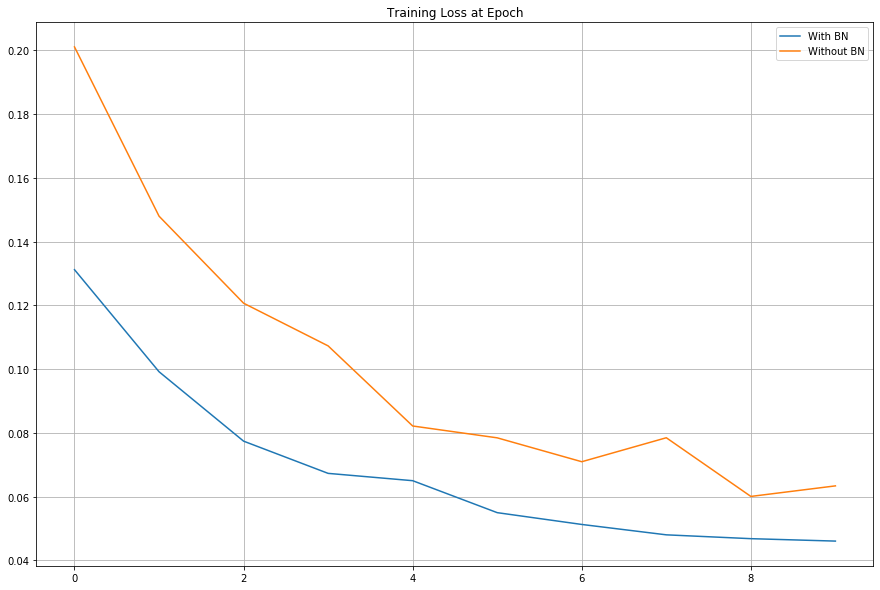

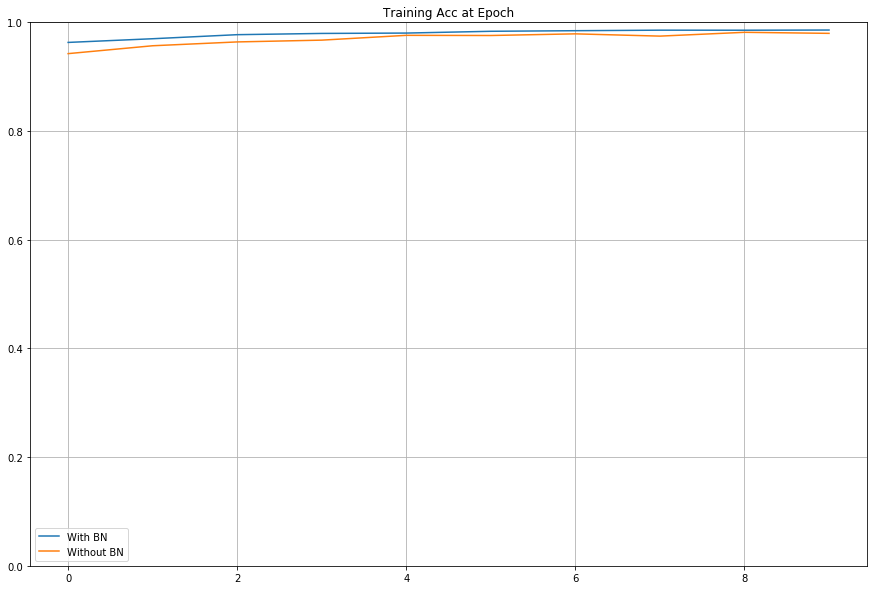

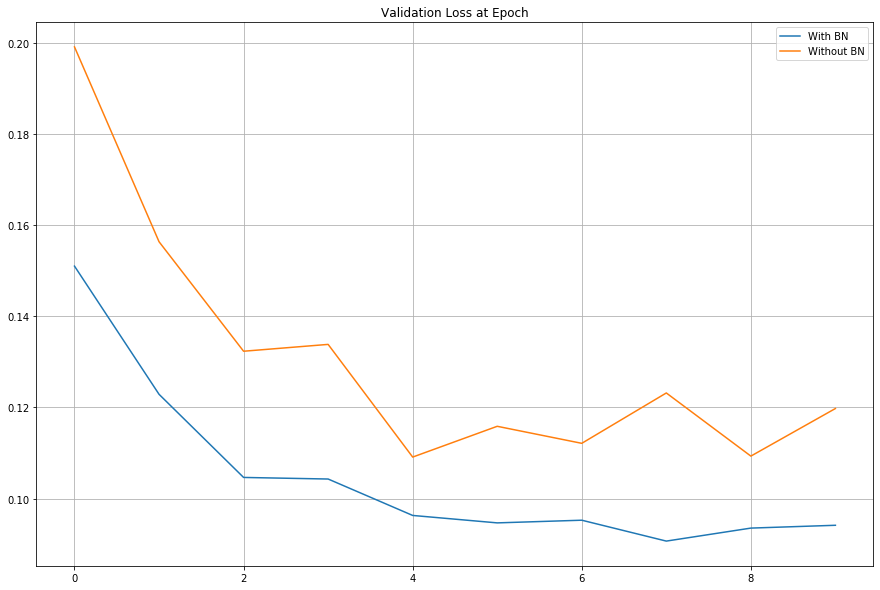

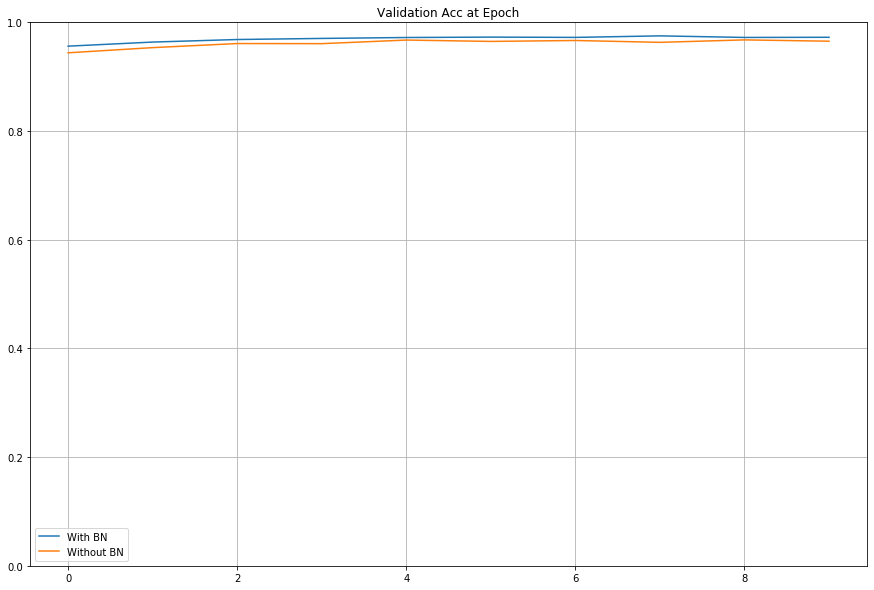

In [58]:
def plot_compare(loss_list: list, ylim=None, title=None) -> None:
    bn = [i[0] for i in loss_list]
    nn = [i[1] for i in loss_list]

    plt.figure(figsize=(15, 10))
    plt.plot(bn, label='With BN')
    plt.plot(nn, label='Without BN')
    if ylim:
        plt.ylim(ylim)

    if title:
        plt.title(title)
    plt.legend()
    plt.grid('on')
    plt.show()
    
plot_compare(train_losses, title='Training Loss at Epoch')
plot_compare(train_accs, [0, 1.0], title='Training Acc at Epoch')
plot_compare(valid_losses, title='Validation Loss at Epoch')
plot_compare(valid_accs, [0, 1.0], title='Validation Acc at Epoch')